In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Métodos para Encontrar Raízes

> f(x) = x³ - 15x² + 13x + 5

In [8]:
def f(x):
    return (x ** 3) - 15 * (x ** 2) + 13 * x + 5

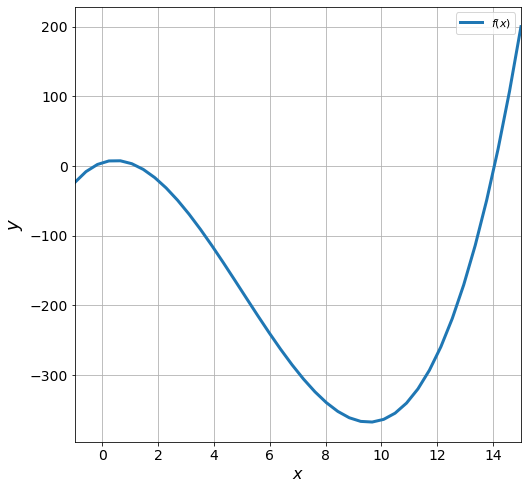

In [3]:
# Realizando plot 
# Convertendo respostas para numpy
x_num, y_num = 1, 1
#beta_num = np.array(solution).astype(float).flatten()

# Gerando a malha (grid)
x_min, x_max = -1, 15
x_grid = np.linspace(x_min, x_max, 40)

# Calculando o valor da função (no caso, a reta) nesta malha (grid) gerada
p_grid = (x_grid ** 3) - 15 * (x_grid ** 2) + 13 * (x_grid) + 5

# Instruções do plot
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(x_grid, p_grid, linewidth = 3) # reta
ax.plot(x_num, y_num, linestyle = "None") # pontos do conjunto de dados

# Labels nos eixos, limites do plot e legenda
ax.set_xlabel("$x$", size = 16)
ax.set_ylabel("$y$", size = 18)
ax.set_xlim(x_min, x_max)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(["$f(x)$"], loc = "upper right", fontsize = 11)
ax.grid(True)

plt.show()

### Bissecção

In [23]:
def bissecção(a, b, ξ):
    x = (a + b) / 2
    y = f(x)
    if abs(y) < ξ:
        return x
    if f(a) * y > 0:
        return bissecção(x, b, ξ)
    else:
        return bissecção(a, x, ξ)
        

In [10]:
bissecção(-1, 15, 0.001)

14.049362182617188

### Método da Falsa Posição

In [21]:
def falsa_posição(a, b, ξ):
    f_a, f_b = f(a), f(b)
    x = (a * f_b - b * f_a) / (f_b - f_a)
    y = f(x)
    if abs(y) < ξ:
        return x
    if f_a * y > 0:
        return falsa_posição(x, b, ξ)
    else:
        return falsa_posição(a, x, ξ)

In [22]:
falsa_posição(-1, 15, 0.01)

-0.2872124463785822